# Import necessary libraries/packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

In [2]:
#Load Dataset
data = pd.read_csv(r'D:\data analytic\project\porfolioProject\Actual Project\Dataset\netflix_review\netflix_reviews.csv')

In [3]:
data.head(3)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,fd7ac453-d685-461b-9488-878faa298552,Noob Player,search engine not work. my list not show on ap...,2,0,8.140.1 build 14 51170,2024-12-03 15:37:58,8.140.1 build 14 51170
1,596d23d2-cea2-4656-9759-77790a5eea31,Rinanaa,I still can't log in. I don't know what's wron...,1,0,NaN,2024-12-03 15:26:34,NaN
2,f2d0a4be-3c31-4800-bd9d-f1ae5a42a77c,lohit dhakad,It's not working,1,0,8.140.1 build 14 51170,2024-12-03 15:21:34,8.140.1 build 14 51170


In [4]:
data.shape

(120398, 8)

In [5]:
#Check the missing value
data.isnull().sum()

reviewId                    0
userName                    2
content                     4
score                       0
thumbsUpCount               0
reviewCreatedVersion    18421
at                          0
appVersion              18421
dtype: int64

In [6]:
#Check the duplicated value
data.duplicated().sum()

287

In [7]:
#Check if the two columns, "appVersion" and "reviewCreatedVersion", are identical.
data['appVersion'].unique()

array(['8.140.1 build 14 51170', nan, '7.110.0 build 6 35520',
       '8.136.0 build 3 50908', '8.139.3 build 31 51120',
       '7.120.3 build 29 35592', '8.96.1 build 16 50568',
       '8.137.0 build 4 50942', '8.20.0 build 12 40171',
       '8.129.0 build 5 50801', '8.100.0 build 6 50594',
       '8.130.0 build 3 50815', '8.66.1 build 12 50409',
       '8.69.0 build 12 50417', '8.104.0 build 5 50619',
       '8.58.0 build 8 50362', '8.119.1 build 13 50707',
       '4.16.4 build 15215', '8.111.0 build 4 50659',
       '8.121.2 build 22 50727', '8.30.3 build 14 50239',
       '8.127.1 build 10 50788', '8.132.2 build 18 50846',
       '8.139.1 build 24 51108', '8.124.0 build 2 50751',
       '8.59.0 build 9 50369', '8.72.1 build 6 50434',
       '8.134.1 build 10 50872', '8.138.1 build 10 50974',
       '8.113.3 build 31 50678', '8.51.0 build 6 50325',
       '8.35.0 build 19 50257', '4.16.3 build 15172',
       '7.95.0 build 12 35383', '8.94.0 build 10 50546',
       '8.101.2 build 9 5

In [8]:
data['score'].unique()

array([2, 1, 5, 3, 4], dtype=int64)

In [9]:
data['reviewCreatedVersion'].unique()

array(['8.140.1 build 14 51170', nan, '7.110.0 build 6 35520',
       '8.136.0 build 3 50908', '8.139.3 build 31 51120',
       '7.120.3 build 29 35592', '8.96.1 build 16 50568',
       '8.137.0 build 4 50942', '8.20.0 build 12 40171',
       '8.129.0 build 5 50801', '8.100.0 build 6 50594',
       '8.130.0 build 3 50815', '8.66.1 build 12 50409',
       '8.69.0 build 12 50417', '8.104.0 build 5 50619',
       '8.58.0 build 8 50362', '8.119.1 build 13 50707',
       '4.16.4 build 15215', '8.111.0 build 4 50659',
       '8.121.2 build 22 50727', '8.30.3 build 14 50239',
       '8.127.1 build 10 50788', '8.132.2 build 18 50846',
       '8.139.1 build 24 51108', '8.124.0 build 2 50751',
       '8.59.0 build 9 50369', '8.72.1 build 6 50434',
       '8.134.1 build 10 50872', '8.138.1 build 10 50974',
       '8.113.3 build 31 50678', '8.51.0 build 6 50325',
       '8.35.0 build 19 50257', '4.16.3 build 15172',
       '7.95.0 build 12 35383', '8.94.0 build 10 50546',
       '8.101.2 build 9 5

In [10]:
is_dup_cols = data['reviewCreatedVersion'].equals(data['appVersion'])
is_dup_cols

True

In [11]:
data['Match'] = data['reviewCreatedVersion'] == data['appVersion']
mismatch = len(data) - data['Match'].sum()
mismatch

18421

In [12]:
#Drop identical columns
data.drop(columns=['reviewCreatedVersion', 'Match'], inplace=True)

# Which of the top 30 App version has the highest rating?

In [19]:
#Create the new dataset for chart
app_rating = data.groupby('appVersion').agg({'score':'mean', 'thumbsUpCount':'sum'}).reset_index()

In [20]:
app_rating.sort_values('score', ascending=False, inplace=True)
app_rating

,appVersion,score,thumbsUpCount
330,7.68.2 build 34 35041,5.0,0
184,6.4.0 build 28128,5.0,0
130,5.4.0 build 20221,5.0,0
281,7.42.0 build 3 34673,5.0,0
23,3.15.1 build 5253,5.0,1
...,...,...,...
549,8.74.0 build 2 50439,1.0,1
33,3.3.3 build 1474,1.0,0
89,4.9.3 build 10052,1.0,0
5,2.3.0 build 902,1.0,0


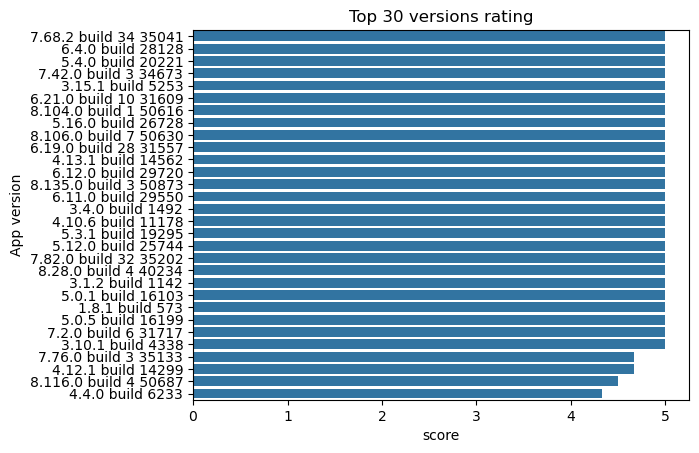

In [21]:
#Plot the dataset by using Seaborn library
sns.barplot(data=app_rating[:30], x='score', y='appVersion', orient='h')
plt.title('Top 30 versions rating')
plt.ylabel('App version')
plt.show()

There are 26 versions that have a 5-point rating.

# Which version of the top 30 has the highest like?

In [22]:
data.head(3)

,reviewId,userName,content,score,thumbsUpCount,at,appVersion
0,fd7ac453-d685-461b-9488-878faa298552,Noob Player,search engine not work. my list not show on ap...,2,0,2024-12-03 15:37:58,8.140.1 build 14 51170
1,596d23d2-cea2-4656-9759-77790a5eea31,Rinanaa,I still can't log in. I don't know what's wron...,1,0,2024-12-03 15:26:34,NaN
2,f2d0a4be-3c31-4800-bd9d-f1ae5a42a77c,lohit dhakad,It's not working,1,0,2024-12-03 15:21:34,8.140.1 build 14 51170


In [24]:
import plotly.graph_objects as go

In [29]:
#Create an interactive chart using Plotly to show which version has the highest rating and the most likes.
fig = go.Figure()
fig.add_trace(go.Bar(x=app_rating[:30]['appVersion'], y=app_rating[:30]['score'], name='Rating', marker_color='blue'))
fig.add_trace(go.Scatter(mode='lines+markers', x=app_rating[:30]['appVersion'], y=app_rating[:30]['thumbsUpCount'], name='Like', marker_color='red', yaxis='y2'))
fig.update_layout(yaxis=dict(title='Rating'), yaxis2=dict(title='Like', overlaying='y', side='right'), xaxis=dict(title='App version'))
fig.show()

There are 2 versions ("6.19.0 build 28 31557" and "7.2.0 build 631717") among the 5-point rating versions.

# Perform sentiment analysis to identify the version with the highest combined value of rating, likes, and reviews.

In [31]:
from textblob import TextBlob

In [37]:
polarity = []
for i in data['content']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [38]:
polarity

[0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.7,
 0.4777777777777778,
 0.004166666666666652,
 -0.35,
 -1.0,
 0.7366666666666667,
 0.0,
 0.0,
 0.0,
 0.25,
 -0.1875,
 0.5,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.29107142857142854,
 1.0,
 0.5,
 0.5,
 0.9099999999999999,
 0.0,
 0.7,
 0.0,
 0.0,
 0.35,
 0.0,
 0.325,
 0.7,
 0.0,
 0.0,
 0.7,
 0.7,
 0.7,
 0.6,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.9099999999999999,
 -0.6041666666666666,
 0.6566666666666667,
 -0.35,
 0.20833333333333334,
 0.21428571428571427,
 0.0,
 -0.5499999999999999,
 0.0,
 0.6000000000000001,
 -0.2,
 0.9099999999999999,
 0.35,
 0.7,
 0.16,
 1.0,
 -0.1777777777777778,
 -0.03778409090909091,
 -0.048828125,
 0.78,
 0.0,
 0.5,
 0.7,
 0.4166666666666667,
 0.0778409090909091,
 -1.0,
 0.8,
 -0.5,
 0.7,
 -1.0,
 0.0,
 0.0,
 0.5,
 -0.09583333333333335,
 0.6,
 0.0,
 -0.1,
 -0.15454545454545457,
 0.0,
 0.16875,
 0.3666666666666667,
 -0.25,
 1.0,
 -0.16666666666666666,
 0.0,
 0.9099999999999999,
 0.35,
 0.0,
 0.6,
 -1.0,
 0.7,
 0.09999999999999998,
 0.8,
 -0.

In [39]:
data['polarity'] = polarity

In [40]:
data.head(3)

,reviewId,userName,content,score,thumbsUpCount,at,appVersion,polarity
0,fd7ac453-d685-461b-9488-878faa298552,Noob Player,search engine not work. my list not show on ap...,2,0,2024-12-03 15:37:58,8.140.1 build 14 51170,0.0
1,596d23d2-cea2-4656-9759-77790a5eea31,Rinanaa,I still can't log in. I don't know what's wron...,1,0,2024-12-03 15:26:34,NaN,-0.5
2,f2d0a4be-3c31-4800-bd9d-f1ae5a42a77c,lohit dhakad,It's not working,1,0,2024-12-03 15:21:34,8.140.1 build 14 51170,0.0


In [45]:
app_polarity=  data.groupby('appVersion')['polarity'].mean().sort_values(ascending=False).reset_index()

In [46]:
app_polarity

,appVersion,polarity
0,5.12.0 build 25744,0.8500
1,5.16.0 build 26726,0.8500
2,5.4.0 build 20221,0.8000
3,6.24.0 build 2 31642,0.8000
4,5.0.2 build 16131,0.7000
...,...,...
588,5.3.0 build 19257,-0.4375
589,6.5.1 build 28339,-0.5000
590,8.24.0 build 1 40203,-0.5000
591,7.109.0 build 4 35508,-0.8000


In [47]:
new_app_rating = app_rating.merge(app_polarity, how='left', on='appVersion')

In [50]:
new_app_rating.sort_values(['score', 'thumbsUpCount', 'polarity'], ascending=[False, False, False], inplace=True)

In [52]:
new_app_rating

,appVersion,score,thumbsUpCount,polarity
24,7.2.0 build 6 31717,5.0,58,0.093750
9,6.19.0 build 28 31557,5.0,56,0.700000
18,7.82.0 build 32 35202,5.0,2,0.533333
11,6.12.0 build 29720,5.0,2,0.300000
5,6.21.0 build 10 31609,5.0,2,0.000000
...,...,...,...,...
587,3.16.2 build 5358,1.0,0,-0.400000
590,4.9.3 build 10052,1.0,0,-0.400000
573,5.3.0 build 19257,1.0,0,-0.437500
570,6.5.1 build 28339,1.0,0,-0.500000


In [53]:
import plotly.express as px

In [58]:
fig = px.scatter(
    new_app_rating[:30],
    x='score',
    y='polarity',
    size='thumbsUpCount',
    hover_name='appVersion',
    color='thumbsUpCount',
    title="Top 30 app version's rating",
    width=800,
    height=500
)
fig.show()


Version 6.19.0 build 28 31557 has the highest total of positive ratings, likes, and reviews among the top 30 Netflix versions. 